#### What Factors Most Strongly Predict Box Office Success — Budget, Cast Popularity, or IMDb Ratings? | Do Movies Released in Summer Perform Better Financially Than Those in Winter? | Is There a Significant Difference Between Critics' and Audience Ratings Across Genres?

### Data Cleaning

#### `title.basics.tsv` Analysis

In [ ]:
# Reading the raw data in title.basics.tsv
# it contains info about movies, TV shows, shorts, etc.
# it contains a huge amount of data. We'll remove the useless ones

import pandas as pd

basics = pd.read_csv(
    "imdb/original/title.basics.tsv.gz",
    sep="\t",
    na_values="\\N",
    low_memory=False
)

print(f"Very first shape: {basics.shape}")   # (12163825, 9)

def filterYears(year):
    return 0 if pd.isna(year) else int(year) # remove years that are \N

basics['startYearInt'] = basics['startYear'].apply(filterYears)

basics = basics[basics['startYearInt'] > 2000] # remove old works

print(f"After 2000: {basics.shape}")  # (8197842, 10)

Very first shape: (12163825, 9)
After 2000: (8197842, 10)


In [ ]:
print(f"After 2000: {basics.shape}")    # (8197842, 10)
basics = basics[basics['startYearInt'] > 2015]   # remove works before 2015
print(f"After 2015: {basics.shape}")    # (4577767, 10)

After 2000: (8197842, 10)
After 2015: (4577767, 10)


In [ ]:
print(f"All data: {basics.shape}")    # (8197842, 10)
basics = basics[basics['titleType'] == 'movie']  # keep movies only
print(f"All data: {basics.shape}")    # (197628, 10)

All data: (4577767, 10)
All data: (197628, 10)


In [17]:
basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,startYearInt
0,tt0011801,movie,Tötet nicht mehr,Tötet nicht mehr,0,2019.0,NaN,NaN,"Action,Crime",2019
9,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020.0,NaN,70.0,Drama,2020
11,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,NaN,122.0,Drama,2018
12,tt0070596,movie,Socialist Realism,El realismo socialista,0,2023.0,NaN,78.0,"Drama,History",2023
15,tt0077684,movie,Histórias de Combóios em Portugal,Histórias de Combóios em Portugal,0,2022.0,NaN,46.0,Documentary,2022
...,...,...,...,...,...,...,...,...,...,...
8197592,tt9916270,movie,Il talento del calabrone,Il talento del calabrone,0,2020.0,NaN,84.0,Thriller,2020
8197635,tt9916362,movie,Coven,Akelarre,0,2020.0,NaN,92.0,"Drama,History,Horror",2020
8197664,tt9916428,movie,The Secret of China,Hong xing zhao yao Zhong guo,0,2019.0,NaN,NaN,"Adventure,History,War",2019
8197712,tt9916538,movie,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,0,2019.0,NaN,123.0,Drama,2019


In [19]:
# keep only the needed features
basics = basics[[
    'tconst',
    'primaryTitle',
    'startYearInt',
    'genres',
    'runtimeMinutes'
]]

basics

,tconst,primaryTitle,startYearInt,genres,runtimeMinutes
0,tt0011801,Tötet nicht mehr,2019,"Action,Crime",NaN
9,tt0062336,The Tango of the Widower and Its Distorting Mi...,2020,Drama,70.0
11,tt0069049,The Other Side of the Wind,2018,Drama,122.0
12,tt0070596,Socialist Realism,2023,"Drama,History",78.0
15,tt0077684,Histórias de Combóios em Portugal,2022,Documentary,46.0
...,...,...,...,...,...
8197592,tt9916270,Il talento del calabrone,2020,Thriller,84.0
8197635,tt9916362,Coven,2020,"Drama,History,Horror",92.0
8197664,tt9916428,The Secret of China,2019,"Adventure,History,War",NaN
8197712,tt9916538,Kuambil Lagi Hatiku,2019,Drama,123.0


##### Cleaning The Other Features

In [ ]:
# tconst -> primary key (must be accurate)

# primary title -> just a readable name
basics[pd.isna(basics['primaryTitle'])]

,tconst,primaryTitle,startYearInt,genres,runtimeMinutes
5929423,tt37879948,NaN,2026,Horror,NaN


In [ ]:
# Just one invalid row -> we can remove it
basics = basics[basics['primaryTitle'].notna()]  # removing invalid titles
basics.shape

(197627, 5)

In [27]:
basics[pd.isna(basics['genres'])].shape[0]

9071

In [ ]:
# they shape around 4.5% of the dataset
# plus, genre is a key feature

basics = basics[basics['genres'].notna()]  # removing invalid genres
basics.shape

(188556, 5)

In [31]:
basics[pd.isna(basics['runtimeMinutes'])].shape

(46339, 5)

There is a great portion of NA values

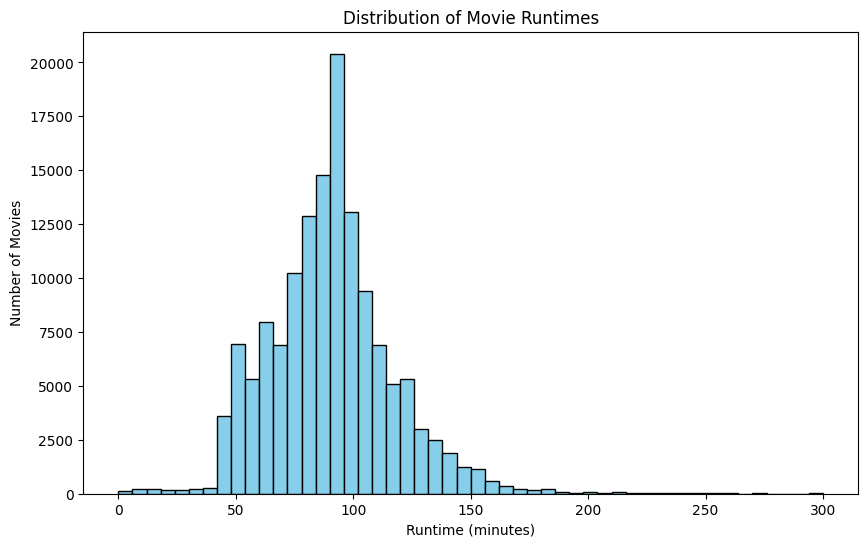

In [ ]:
# histogram for movies duration

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(basics['runtimeMinutes'], bins=50, color='skyblue', edgecolor='black', range=(0, 300))
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Number of Movies')
plt.show()

In [ ]:
# The vast majority of the data are between 50 to 150 minutes
# we can discard the outliers to reduce the data size
basics = basics[basics['runtimeMinutes'].notna()]
basics = basics[basics['runtimeMinutes'].between(40, 170)]
basics.shape

(139749, 5)

Still a great amount of data

#### `title.ratings.tsv` Analysis

In [ ]:
# cleaning ratings data
ratings = pd.read_csv(
    "imdb/original/title.ratings.tsv.gz",
    sep="\t",
    na_values="\\N",
    low_memory=False
)

print(ratings.shape)
ratings.head()

(1613642, 3)


,tconst,averageRating,numVotes
0,tt0000001,5.7,2189
1,tt0000002,5.5,309
2,tt0000003,6.4,2276
3,tt0000004,5.1,197
4,tt0000005,6.2,3014


In [ ]:
# checking NA values in average rating
ratings[pd.isna(ratings['averageRating'])].shape

(0, 3)

No missing values

In [ ]:
# Doing the same with number of votes
ratings[pd.isna(ratings['numVotes'])].shape

(0, 3)

No missing values

In [110]:
# removing all the records that don't have reference to basics
ratings = ratings[
    ratings['tconst'].isin(basics['tconst'])
]

ratings.shape

(91305, 3)

Huge difference

#### `title.principals.tsv` Analysis

In [ ]:
# title.principals.tsv provides data about the contributors
# to the movies (actors, actresses, directors, etc.)
# it refers to them with nconst (identifier) so you can access more info
# from name.basics.tcv using nconst primary key

# cleaing title.principals
principals = pd.read_csv(
    "imdb/original/title.principals.tsv.gz",
    sep="\t",
    na_values="\\N",
    low_memory=False
)

print(principals.shape)
principals.head()

(96756342, 6)


,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,NaN,"[""Self""]"
1,tt0000001,2,nm0005690,director,NaN,NaN
2,tt0000001,3,nm0005690,producer,producer,NaN
3,tt0000001,4,nm0374658,cinematographer,director of photography,NaN
4,tt0000002,1,nm0721526,director,NaN,NaN


**96 MILLION RECORDS**

filtering is needed

In [ ]:
principals = principals[
  principals['category'].isin(['actor', 'actress', 'director'])
]  # keep only the actors, actresses, directors, and producers

principals.shape

(48466950, 6)

Almost the half

#### `name.basics.tsv` Analysis

In [ ]:
# this provides more info about the contributors like name,
# birth year, death year, profession, works, etc.

names = pd.read_csv(
    "imdb/original/name.basics.tsv.gz",
    sep="\t",
    na_values="\\N",
    low_memory=False
)

names

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899.0,1987.0,"actor,miscellaneous,producer","tt0072308,tt0050419,tt0027125,tt0025164"
1,nm0000002,Lauren Bacall,1924.0,2014.0,"actress,miscellaneous,soundtrack","tt0037382,tt0075213,tt0038355,tt0117057"
2,nm0000003,Brigitte Bardot,1934.0,NaN,"actress,music_department,producer","tt0057345,tt0049189,tt0056404,tt0054452"
3,nm0000004,John Belushi,1949.0,1982.0,"actor,writer,music_department","tt0072562,tt0077975,tt0080455,tt0078723"
4,nm0000005,Ingmar Bergman,1918.0,2007.0,"writer,director,actor","tt0050986,tt0069467,tt0083922,tt0050976"
...,...,...,...,...,...,...
14960700,nm9993714,Romeo del Rosario,NaN,NaN,"animation_department,art_department","tt11657662,tt14069590,tt2455546"
14960701,nm9993716,Essias Loberg,NaN,NaN,NaN,NaN
14960702,nm9993717,Harikrishnan Rajan,NaN,NaN,cinematographer,tt8736744
14960703,nm9993718,Aayush Nair,NaN,NaN,cinematographer,tt8736744


In [93]:
# checking invalid names (invalid records)
names[pd.isna(names['primaryName'])].shape

(77, 6)

In [94]:
names = names[names['primaryName'].notna()]
names.shape

(14960628, 6)

In [96]:
# remove those who are with invalid profession
names = names[names['primaryProfession'].notna()]

# remove those who are not actors, actresses, directors, etc.
def isValidProfession(profStr):
    profLst = profStr.split(",")
    for i in ["actor", "actress", "director", "producer"]:
        if i in profLst:
            return True
    return False

names = names[names['primaryProfession'].apply(isValidProfession)]
names.shape

(7007034, 6)

Almost half of the dataset were discarded

In [118]:
principals = principals[
    principals['tconst'].isin(basics['tconst'])
] # keep only the principals that exist in the basics dataset

principals.shape

(939804, 6)

Significant difference

In [119]:
# keep only the records in principals that exist in names
principals = principals[
    principals['nconst'].isin(names['nconst'])
]

principals.shape

(939804, 6)

The same

In [120]:
names = names[
  names['nconst'].isin(principals['nconst'])
]  # keep only the records that exist in principals

names.shape

(502552, 6)

Another significant difference

In [122]:
# Saving data as tsv files

basics.to_csv(
  "imdb/title.basics-processed.tsv",
  sep='\t',
  index=False
)

ratings.to_csv(
  "imdb/title.ratings-processed.tsv",
  sep='\t',
  index=False
)

principals.to_csv(
  "imdb/title.principals-processed.tsv",
  sep='\t',
  index=False
)

names.to_csv(
  "imdb/name.basics-processed.tsv",
  sep='\t',
  index=False
)

In [121]:
print(basics.shape[0])
print(ratings.shape[0])
print(principals.shape[0])
print(names.shape[0])

139749
91305
939804
502552
